In [61]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import plotly.graph_objs as go
import plotly.plotly as py
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import warnings
import matplotlib.style as style
from scipy.stats import t as student_t
from statsmodels.graphics.factorplots import interaction_plot
style.use('fivethirtyeight')
warnings.filterwarnings("ignore")

In [62]:
data = pd.read_csv('data.csv',index_col='listing_id')

In [63]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [64]:
data.drop_duplicates(inplace=True)

In [65]:
data.tail()

,state,title,description,price,quantity,tags,materials,featured_rank,views,num_favorers,who_made,when_made,item_weight,item_weight_unit,occasion,style,is_customizable,is_digital
listing_id,,,,,,,,,,,,,,,,,,
506439669,active,"Teal Pillow Cover, Teal Blue Pillow, Geometric...","One gorgeous, geometric pillow cover in shades...",19.00,22,"['16x16 18x18 20x20', '22x22 12x16 12x18', '12...",['Cotton'],1.0,1974,201,i_did,made_to_order,NaN,oz,NaN,['Traditional'],True,False
658658693,active,Vintage Metal Roses Linked Earrings Screw Back...,"Vintage screw back, dangle or drop earrings wi...",24.00,1,"['roses', 'white metal', 'jewelry', 'rose link...",['white metal'],NaN,2,1,someone_else,1930s,NaN,oz,NaN,NaN,False,False
658658689,active,"Waist belt,Leather corset belt,bridal belt,har...","Leather corset belt,bridal belt,harness belt,w...",65.00,10,"['Leather corset belt', 'bridal belt', 'harnes...",['leather'],NaN,1,0,i_did,made_to_order,NaN,g,NaN,NaN,True,False
596699241,active,"Digital Planner, GoodNotes Planner, Digital Jo...",*** NOTE: This is digital product. No physical...,14.99,88,"['digital planner', 'digital journal', 'goodno...","['pdf', '2 PNG files with free stickers']",NaN,1444,146,i_did,2010_2018,NaN,g,NaN,NaN,True,True
628314754,active,Poster 29x29 &quot;Ehi&quot;,⚡️SPEDIZIONE ESPRESSA 24H⚡️Stampa su cartoncin...,24.00,4,"['il baffo', 'IlBaffo', 'giulio mosca', 'poste...",[],NaN,2489,27,i_did,2010_2018,NaN,g,NaN,NaN,False,False


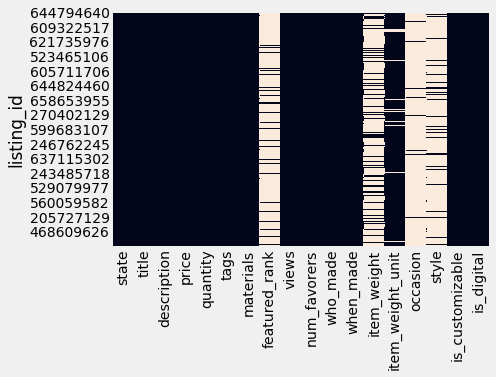

In [66]:
sns.heatmap(data.isnull(), cbar=False)

In [67]:
data['featured_rank'].fillna(0,inplace=True)

In [68]:
data.drop(['item_weight','item_weight_unit'],axis=1,inplace=True)

In [71]:
data['style'].fillna('[]',inplace=True)

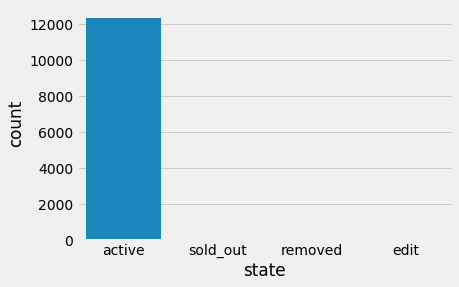

In [72]:
sns.countplot(data['state'])

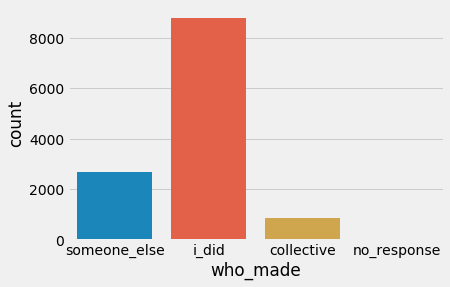

In [73]:
sns.countplot(data['who_made'])

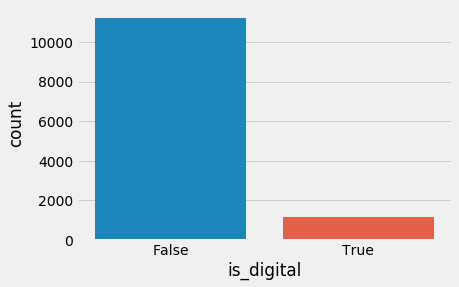

In [74]:
sns.countplot(data['is_digital'])

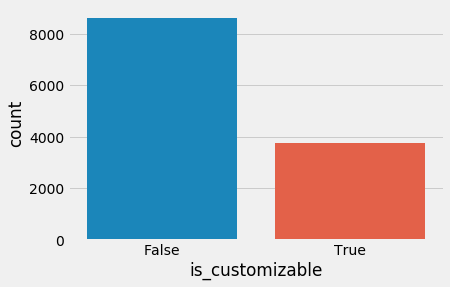

In [75]:
sns.countplot(data['is_customizable'])

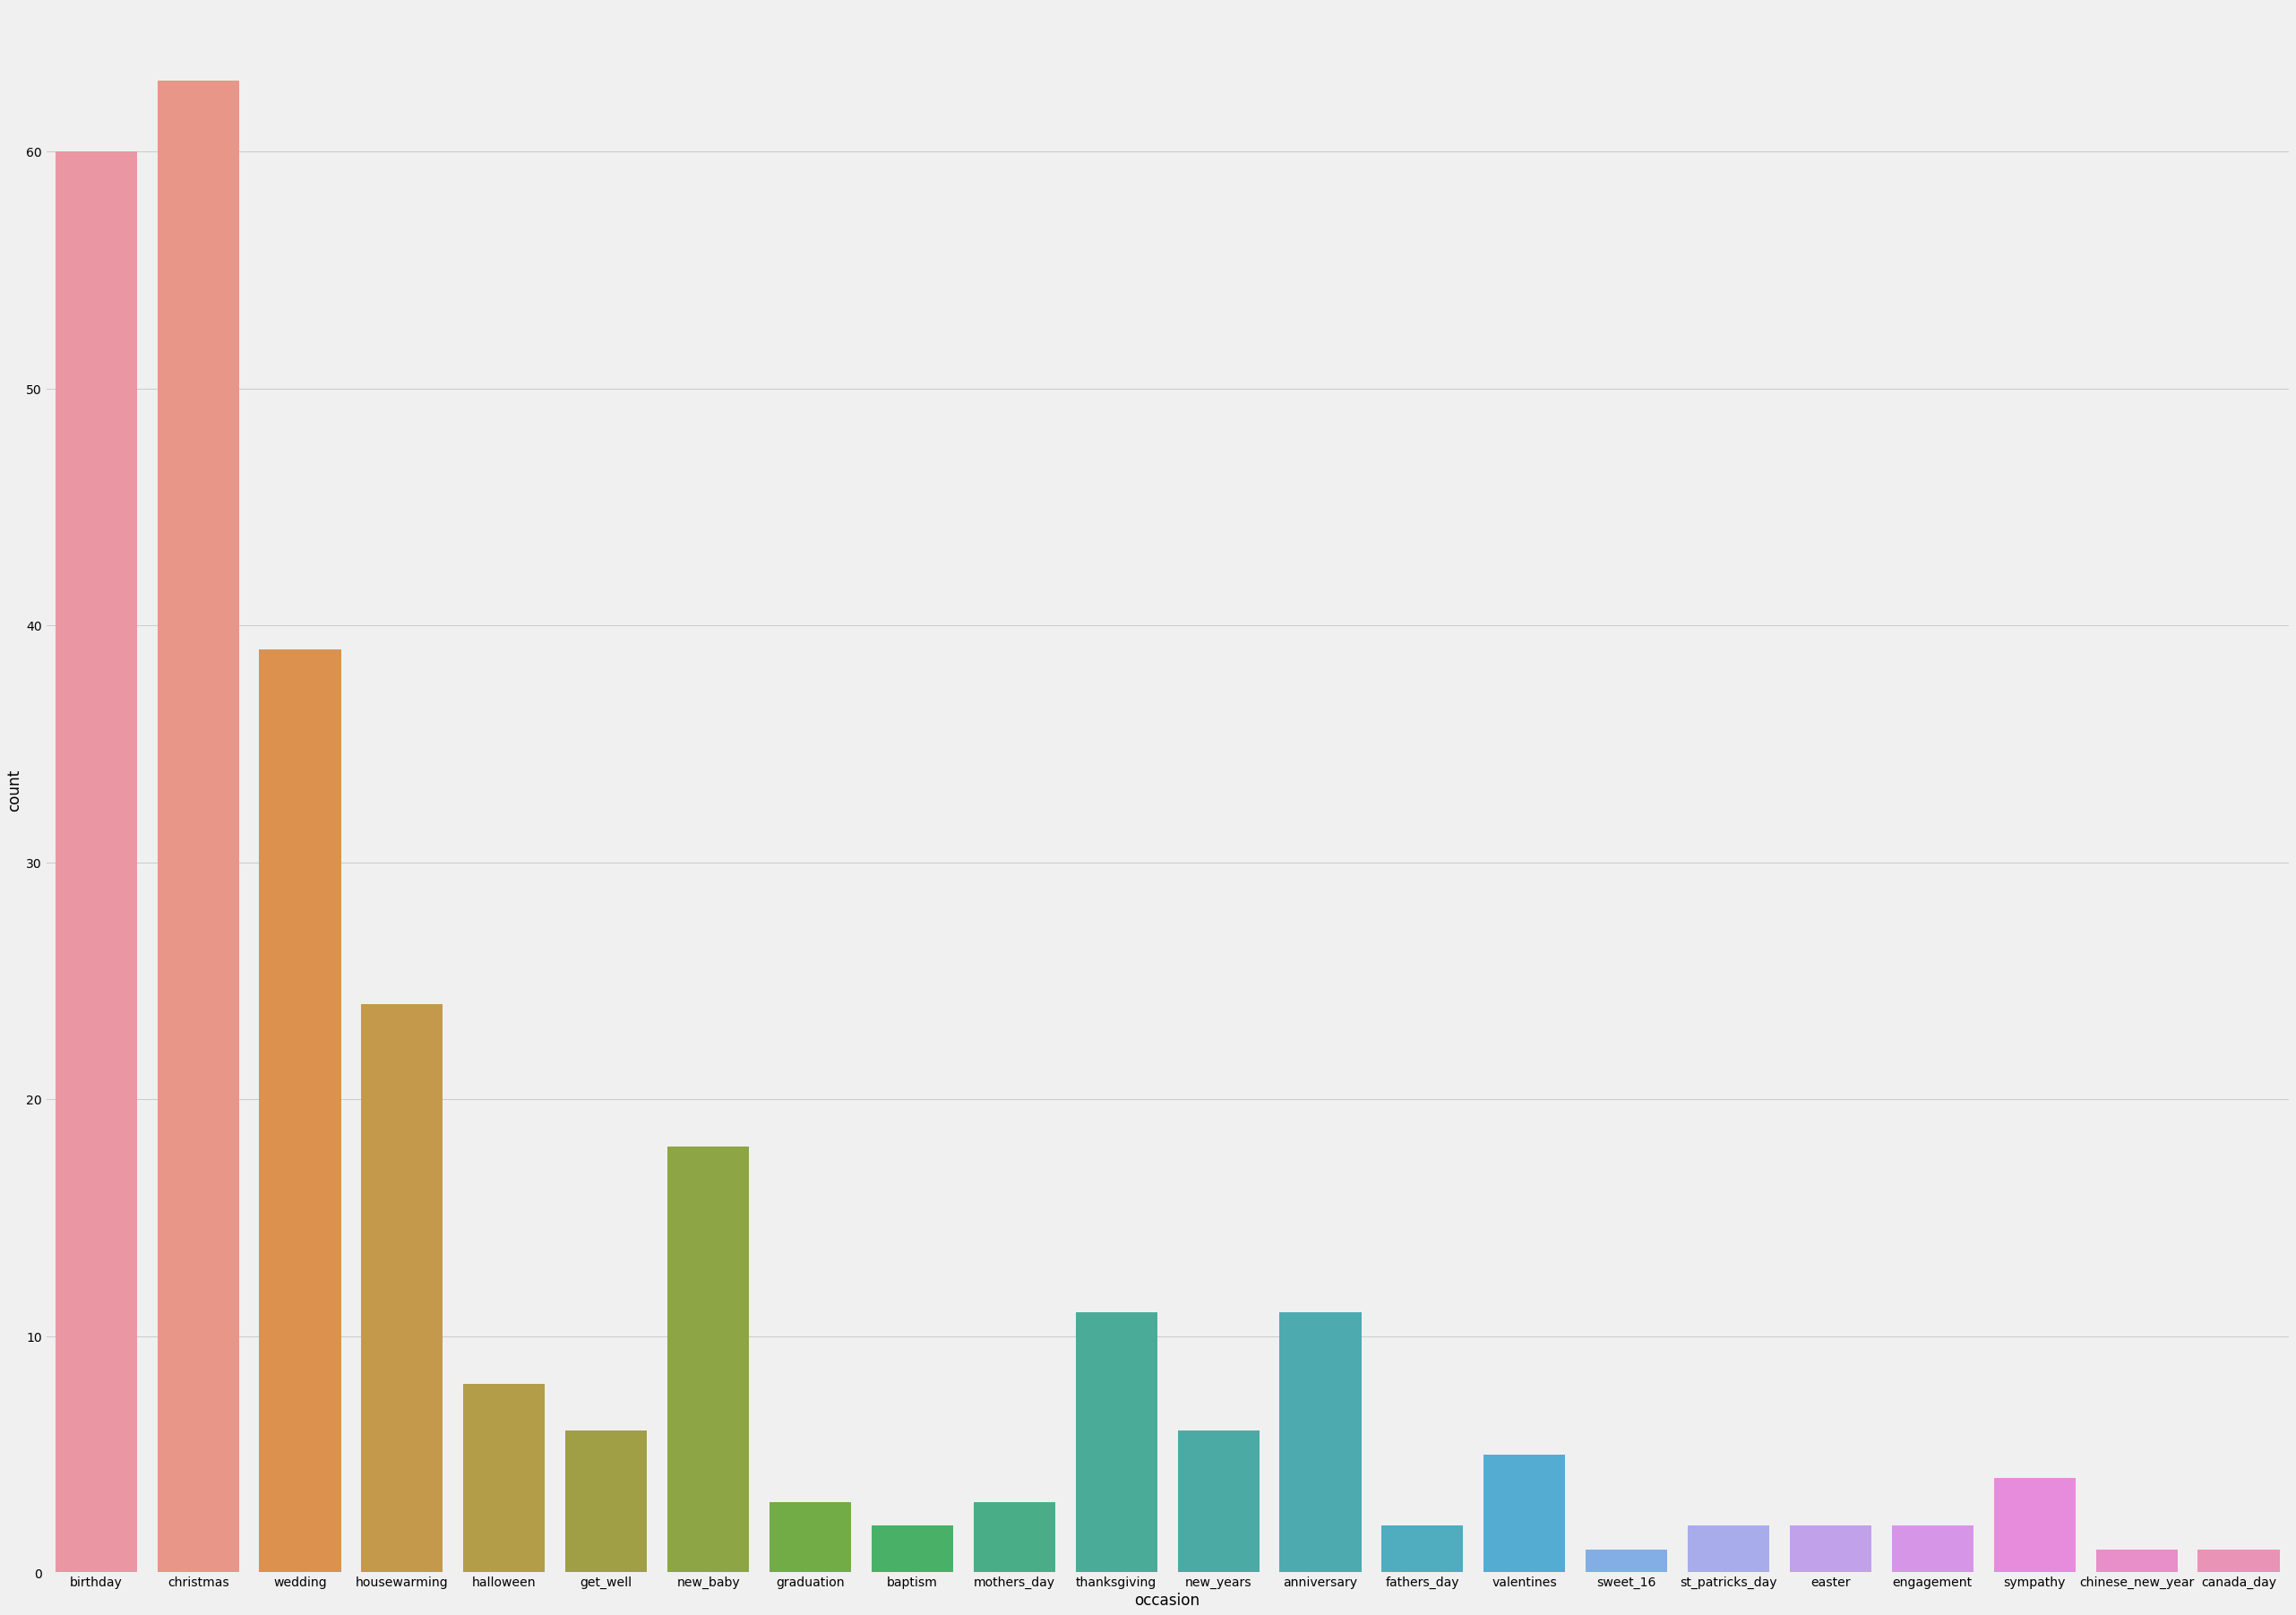

In [77]:
plt.figure(figsize=(40,30))
sns.countplot(data['occasion'])

In [29]:
data['price'].describe()

count    12355.000000
mean        44.691345
std        229.881186
min          0.000000
25%          7.000000
50%         16.500000
75%         33.300000
max      17500.000000
Name: price, dtype: float64

In [30]:
data['quantity'].describe()

count     12355.000000
mean        174.750465
std        2408.065733
min           0.000000
25%           1.000000
50%           5.000000
75%          47.000000
max      180500.000000
Name: quantity, dtype: float64

In [31]:
data.sort_values('price',ascending=False).head(5)

,state,title,description,price,quantity,tags,materials,featured_rank,views,num_favorers,who_made,when_made,item_weight,item_weight_unit,occasion,style,is_customizable,is_digital
listing_id,,,,,,,,,,,,,,,,,,
450985204,active,"Paolo Navone Gadames Chest, circa 1980",Chest by Paolo Navone for Alchimia. Cabinet ha...,17500.0,1,"['circa 1980', 'Paolo Navone Gadames', 'Chest']","['Mirror', 'Wood']",NaN,58,11,someone_else,1980s,NaN,oz,NaN,NaN,False,False
628033423,active,bunch of poppies,There is nothing like a bunch of simple meadow...,6100.0,1,[],[],NaN,8,1,i_did,1980s,NaN,g,NaN,NaN,False,False
628031093,active,Figured Black Walnut Live Edge Custom Dining T...,Sanded To: 2&quot; Thickness Length: 9&#39;...,5940.0,1,"['Raw wood slab', 'Live edge wood slab', 'Cust...","['Kiln Dried', 'Sanded', 'Live Edge', 'Natural...",NaN,9,0,i_did,2010_2018,NaN,oz,NaN,NaN,False,False
628031093,active,Figured Black Walnut Live Edge Custom Dining T...,Sanded To: 2&quot; Thickness Length: 9&#39;...,5940.0,1,"['Raw wood slab', 'Live edge wood slab', 'Cust...","['Kiln Dried', 'Sanded', 'Live Edge', 'Natural...",NaN,8,0,i_did,2010_2018,NaN,oz,NaN,NaN,False,False
644823514,active,Vintage Diamond Engagement Antique Diamond Eng...,This Vintage Engagement Ring circa the 1920&#3...,4800.0,1,"['Engagement Ring', 'Diamond Engagement', 'Dia...","['Diamond', 'White gold']",NaN,0,0,someone_else,1920s,NaN,oz,NaN,NaN,False,False


In [44]:
data.sort_values('quantity',ascending=False).head(5)

,state,title,description,price,quantity,tags,materials,featured_rank,views,num_favorers,who_made,when_made,item_weight,item_weight_unit,occasion,style,is_customizable,is_digital
listing_id,,,,,,,,,,,,,,,,,,
628031525,active,Personalized Gel Candels,These Gel Candels last longer than regular wax...,15.0,180500,"['Gel', 'Candels', 'Decor', 'Scents', 'Persona...","['Gel wax', 'Pearls', 'Scents', 'Shells', 'Let...",NaN,4,0,i_did,made_to_order,16.0,oz,NaN,NaN,False,False
607685655,active,"Dog Collar - Rose Gold Dog Collar - Navy, Blus...",ADD A SLIDE-ON GIRLY BOW: https://www.etsy.com...,12.0,112671,"['Dog Collar', 'Puppy Collar', 'Large Dog Coll...","['Cotton Fabric', 'Interfacing', 'Rose Gold Ha...",NaN,2782,594,i_did,made_to_order,NaN,oz,NaN,NaN,True,False
607685655,active,"Dog Collar - Rose Gold Dog Collar - Navy, Blus...",ADD A SLIDE-ON GIRLY BOW: https://www.etsy.com...,12.0,112671,"['Dog Collar', 'Puppy Collar', 'Large Dog Coll...","['Cotton Fabric', 'Interfacing', 'Rose Gold Ha...",NaN,2783,595,i_did,made_to_order,NaN,oz,NaN,NaN,True,False
627480769,active,"Earring Cards, Necklace Cards, Jewelry Display...",Ready to take your handmade jewelry business t...,20.0,91891,"['saddle hill studios', 'jewelry cards', 'jewe...",[],NaN,667,27,i_did,made_to_order,3.2,oz,NaN,NaN,False,False
641919010,active,Disney Christmas Baseball Shirt | Cinderella C...,Are you lucky enough to be spending the holida...,23.0,39928,"['Disney', 'Disney vacation', 'Disney tank', '...",[],NaN,29,7,i_did,made_to_order,NaN,oz,NaN,NaN,False,False


In [45]:
data.sort_values('views',ascending=False).head(5)

,state,title,description,price,quantity,tags,materials,featured_rank,views,num_favorers,who_made,when_made,item_weight,item_weight_unit,occasion,style,is_customizable,is_digital
listing_id,,,,,,,,,,,,,,,,,,
228864545,active,"Personalized, Custom Name Necklace • 14k Gold ...",Personalized Bar Necklace - top quality that w...,41.00,8,"['perfect bar necklace', 'custom bar necklace'...","['gold fill', '14K gold fill', 'sterling silve...",NaN,497553,13726,i_did,made_to_order,NaN,oz,NaN,"['Modern', 'Minimalist']",True,False
92337714,active,Nose Ring - Nose Piercing - Nose Stud - Tragus...,"Nose ring stud, nose stud, sterling silver, wi...",11.95,43,"['nose stud', 'nose jewelry', 'nose ring', 'tr...",['Silver'],NaN,372138,19614,i_did,2010_2018,NaN,oz,NaN,"['Modern', 'Minimalist']",True,False
92337714,active,Nose Ring - Nose Piercing - Nose Stud - Tragus...,"Nose ring stud, nose stud, sterling silver, wi...",11.95,43,"['nose stud', 'nose jewelry', 'nose ring', 'tr...",['Silver'],NaN,372137,19614,i_did,2010_2018,NaN,oz,NaN,"['Modern', 'Minimalist']",True,False
492227219,active,Family Necklace • Personalized Gift • Linked C...,W H Y ∙ Y O U &#39; L L ∙ L O V E ∙ I T \n\n• ...,39.00,720,"['personalized jewelry', 'personalized Gift', ...","['925 STERLING SILVER', '18K GOLD', 'ROSE GOLD']",1.0,334393,23957,collective,made_to_order,NaN,oz,NaN,"['Minimalist', 'Modern']",True,False
492227219,active,Family Necklace • Personalized Gift • Linked C...,W H Y ∙ Y O U &#39; L L ∙ L O V E ∙ I T \n\n• ...,39.00,725,"['personalized jewelry', 'personalized Gift', ...","['925 STERLING SILVER', '18K GOLD', 'ROSE GOLD']",1.0,334367,23955,collective,made_to_order,NaN,oz,NaN,"['Minimalist', 'Modern']",True,False


In [78]:
corr = data.corr()
corr.style.background_gradient()

,price,quantity,featured_rank,views,num_favorers,is_customizable,is_digital
price,1,-0.00848967,-4.38907e-05,0.00659337,0.00199114,-0.00765182,-0.0525925
quantity,-0.00848967,1,-0.000248136,0.02924,0.0232463,0.0133234,0.019884
featured_rank,-4.38907e-05,-0.000248136,1,0.0150517,0.0143969,-0.00030017,0.00240585
views,0.00659337,0.02924,0.0150517,1,0.880337,0.078023,-0.00237165
num_favorers,0.00199114,0.0232463,0.0143969,0.880337,1,0.0747092,-0.0202495
is_customizable,-0.00765182,0.0133234,-0.00030017,0.078023,0.0747092,1,-0.0397245
is_digital,-0.0525925,0.019884,0.00240585,-0.00237165,-0.0202495,-0.0397245,1


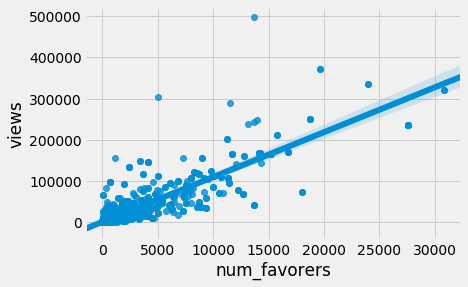

In [79]:
sns.regplot(data['num_favorers'],data['views'])

In [84]:
data['tags_present'] = [0 if x=='[]' else 1 for x in data['tags']]
data['title_present'] = [0 if x=='[]' else 1 for x in data['title']]
data['description_present'] = [0 if x=='[]' else 1 for x in data['description']]
data['style_present']= [0 if x=='[]' else 1 for x in data['style']]
data['is_customizable']= [0 if x==False else 1 for x in data['is_customizable']]
data['is_digital']= [0 if x==False else 1 for x in data['is_digital']]

In [85]:
cat_data = pd.get_dummies(data[['state','who_made','when_made','occasion']],dummy_na=True)

In [90]:
data.head(2)

,state,title,description,price,quantity,tags,materials,featured_rank,views,num_favorers,who_made,when_made,occasion,style,is_customizable,is_digital,tags_present,title_present,description_present,style_present
listing_id,,,,,,,,,,,,,,,,,,,,
644794640,active,US size 7.5 Party Silver Shoes 1970s Metallic ...,Take a look at these glamorous and gorgeous vi...,36.0,1,"['heel sandals', 'summer heels', 'dancing shoe...","['70s', 'silver', 'metallic', 'embellished', '...",0.0,0,0,someone_else,1970s,NaN,[],0,0,1,1,1,0
658628447,active,Ladies&#39; 100% Felted Wool Mittens with Flee...,This pair of mittens is made with burgundy and...,25.0,1,"['Unique', 'wool mittens', 'Felted wool', 'fle...","['wool', 'fleece', 'buttons']",0.0,0,0,i_did,2010_2018,NaN,[],0,0,1,1,1,0


In [88]:
data.columns

Index(['state', 'title', 'description', 'price', 'quantity', 'tags',
       'materials', 'featured_rank', 'views', 'num_favorers', 'who_made',
       'when_made', 'occasion', 'style', 'is_customizable', 'is_digital',
       'tags_present', 'title_present', 'description_present',
       'style_present'],
      dtype='object')

In [92]:
data_mod = data[['price','quantity','featured_rank', 'views', 'num_favorers','is_customizable', 'is_digital',
       'tags_present', 'title_present', 'description_present',
       'style_present']].merge(cat_data,how='outer', left_index=True, right_index=True)

In [94]:
data_mod = data_mod[~data_mod.index.duplicated(keep='first')]

In [98]:
data_mod.to_csv('data_cleaned.csv')